In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

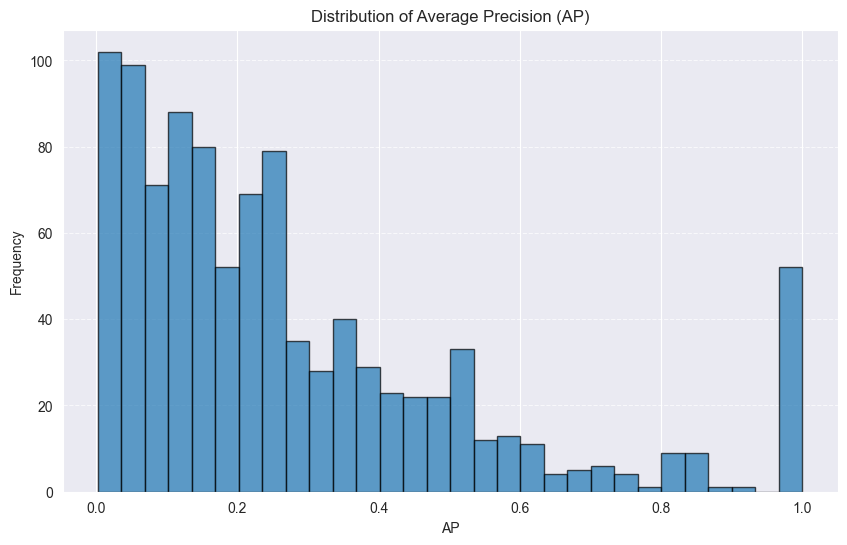

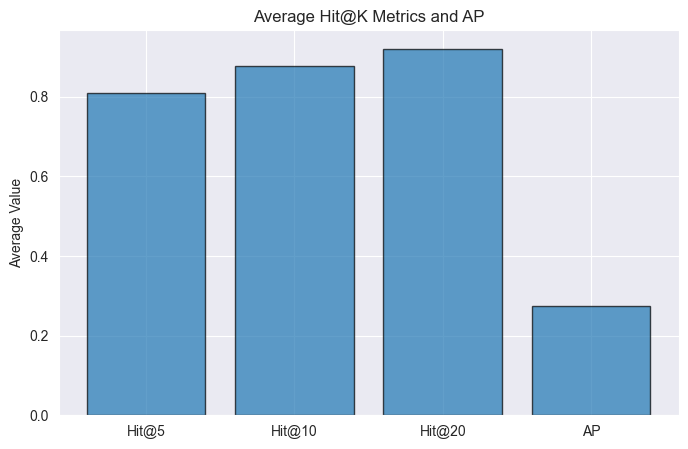

{'Hit@5': np.float64(0.809),
 'Hit@10': np.float64(0.877),
 'Hit@20': np.float64(0.921),
 'AP': np.float64(0.2755671842000645)}

In [7]:
# Read the metrics
data = pd.read_csv('../src/data/query_level_metrics_cross_encoder.csv')

# Calculate mean values for performance metrics
average_metrics = {
    'Hit@5': data['Hit@5'].mean(),
    'Hit@10': data['Hit@10'].mean(),
    'Hit@20': data['Hit@20'].mean(),
    'AP': data['AP'].mean()
}

# Plot 1: Distribution of AP values
plt.figure(figsize=(10, 6))
plt.hist(data['AP'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Average Precision (AP)')
plt.xlabel('AP')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Comparison of Average Hit@K Metrics
plt.figure(figsize=(8, 5))
plt.bar(average_metrics.keys(), average_metrics.values(), alpha=0.7, edgecolor='black')
plt.title('Average Hit@K Metrics and AP')
plt.ylabel('Average Value')
plt.show()

average_metrics

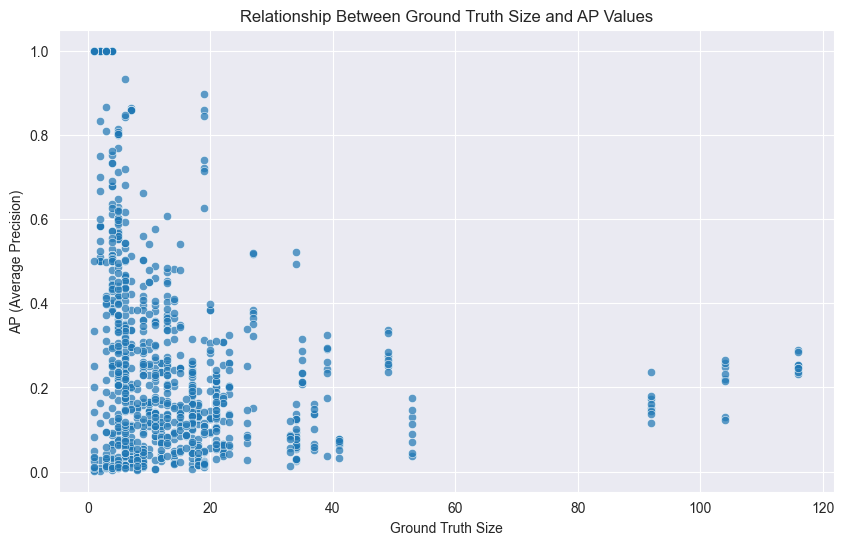

np.float64(-0.24133332764117005)

In [8]:
# Plot the relationship between Ground Truth Size and AP values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ground_truth_size', y='AP', data=data, alpha=0.7)
plt.title('Relationship Between Ground Truth Size and AP Values')
plt.xlabel('Ground Truth Size')
plt.ylabel('AP (Average Precision)')
plt.grid(True)
plt.show()

# Calculate correlation between ground truth size and AP
correlation = data['ground_truth_size'].corr(data['AP'])
correlation

In [9]:
# Filter out the top 10 most difficult queries based on AP values
difficult_queries = data.sort_values(by='AP').head(10)

# Print the top 10 most difficult queries
difficult_queries

,query,ground_truth_size,Hit@5,Hit@10,Hit@20,AP
978,想學習智慧照護的應用，我想知道有哪些課程可以教我如何使用技術幫助老人照護？,1,0,0,0,0.002160
214,我對創新創業很感興趣，想知道這個課程會怎麼教導我們創造新的想法和解決社會問題？,2,0,0,0,0.002448
977,我想了解如何應用科技於照護老人，是否有相關的課程可以幫助我了解這方面的知識？,1,0,0,0,0.003597
881,這學程的課程內容似乎很全面，能夠幫助我了解人工智慧在投資中的應用和實踐，有什麼樣的實習或專案...,8,0,0,0,0.003777
155,這個微學程似乎很有趣，能不能告訴我，該學程會教學生如何分析和溝通台灣的文化資產？,4,0,0,0,0.004610
624,這個學程似乎有很多相關課程，能夠告訴我哪些課程是必修的或者是選修的嗎？,11,0,0,0,0.005257
34,我對永續發展議題很感興趣， STREAM微學程的課程安排是什麼樣的？,11,0,0,0,0.005729
870,碳流資訊盤查與低碳設計微學程的內容蠻多元化的，我想知道有哪些實際應用？,8,0,0,0,0.005851
82,這學程聽起來很有意思，我想深入了解地方文化和創意產業，有哪些課程可以幫助我學習如何將文化故事...,17,0,0,0,0.006906
994,我想知道這個微學程的課程內容是什麼樣的，有些是相關生物資訊的實務應用嗎？,6,0,0,0,0.007655


In [10]:
# Load the target data
target_data = pd.read_csv('../src/data/query_target_label_with_tags.csv')

# Perform a left join on the two datasets based on the 'query' column
combined_data = data.merge(target_data, on='query', how='left')

# Move 'tags' column to the second position
cols = list(combined_data.columns)
cols = [cols[0]] + [cols[-1]] + cols[1:-1]
combined_data = combined_data[cols]

# Filter out the top 10 most difficult queries based on AP values
difficult_queries = combined_data.sort_values(by='AP')

# Print the top 10 most difficult queries
difficult_queries.head(10)

,query,tags,ground_truth_size,Hit@5,Hit@10,Hit@20,AP,relative_courses_id
978,想學習智慧照護的應用，我想知道有哪些課程可以教我如何使用技術幫助老人照護？,智慧長照微學程,1,0,0,0,0.002160,['IHCM620']
214,我對創新創業很感興趣，想知道這個課程會怎麼教導我們創造新的想法和解決社會問題？,創新創業微學程,2,0,0,0,0.002448,"['GEAE2343', 'ISI522']"
977,我想了解如何應用科技於照護老人，是否有相關的課程可以幫助我了解這方面的知識？,智慧長照微學程,1,0,0,0,0.003597,['IHCM620']
881,這學程的課程內容似乎很全面，能夠幫助我了解人工智慧在投資中的應用和實踐，有什麼樣的實習或專案...,人工智能投資微學程,8,0,0,0,0.003777,"['MIS331', 'MIS413', 'FM326', 'MIS572', 'FM517..."
155,這個微學程似乎很有趣，能不能告訴我，該學程會教學生如何分析和溝通台灣的文化資產？,台灣文化英語微學程,4,0,0,0,0.004610,"['GEAE2140', 'GEAE2332', 'GEAE2431', 'GEAE2520']"
624,這個學程似乎有很多相關課程，能夠告訴我哪些課程是必修的或者是選修的嗎？,機器學習與應用微學程,11,0,0,0,0.005257,"['GEAI1359', 'GEAI1369', 'CSE210', 'CSE325', '..."
34,我對永續發展議題很感興趣， STREAM微學程的課程安排是什麼樣的？,STREAM永續發展培力微學程,11,0,0,0,0.005729,"['STP182', 'STP291', 'GEAE2135', 'GEAE2624', '..."
870,碳流資訊盤查與低碳設計微學程的內容蠻多元化的，我想知道有哪些實際應用？,碳流資訊盤查與低碳設計微學程,8,0,0,0,0.005851,"['MEME102', 'MEME102A', 'MEME102B', 'MEME301',..."
82,這學程聽起來很有意思，我想深入了解地方文化和創意產業，有哪些課程可以幫助我學習如何將文化故事...,地方敘事與創生學程,17,0,0,0,0.006906,"['GEAE2108', 'GEAE2233', 'GEAE2301', 'GEAE2328..."
994,我想知道這個微學程的課程內容是什麼樣的，有些是相關生物資訊的實務應用嗎？,醫師工程師微學程,6,0,0,0,0.007655,"['IMST518', 'IMST538', 'IMST541', 'IMST551', '..."


In [11]:
# Group by 'tags' and calculate the mean AP and Hit@K metrics
grouped_by_tags = combined_data.groupby('tags').agg({
    'ground_truth_size': 'mean',
    'AP': 'mean',
    'Hit@5': 'mean',
    'Hit@10': 'mean',
    'Hit@20': 'mean'
}).reset_index()

# Sort the result by AP to identify the most and least difficult tag groups
grouped_by_tags_sorted = grouped_by_tags.sort_values(by='AP')

# Display the grouped results
grouped_by_tags_sorted

,tags,ground_truth_size,AP,Hit@5,Hit@10,Hit@20
38,巨量資料分析學程,18.0,0.026845,0.125,0.250,1.000
35,太空科技微學程,19.0,0.027882,0.125,0.125,0.125
121,音樂藝術管理與行銷學程,9.0,0.043922,0.250,0.250,0.375
1,中文創意跨域應用整合學程,34.0,0.050556,0.125,0.625,0.875
42,應用數學學程,22.0,0.052856,0.125,0.250,0.875
...,...,...,...,...,...,...
63,沉浸式體驗內容應用微學程,1.0,1.000000,1.000,1.000,1.000
64,沉浸式體驗技術與應用學程,1.0,1.000000,1.000,1.000,1.000
105,運輸管理微學程,4.0,1.000000,1.000,1.000,1.000
117,音場技術與情境感受微學程,1.0,1.000000,1.000,1.000,1.000


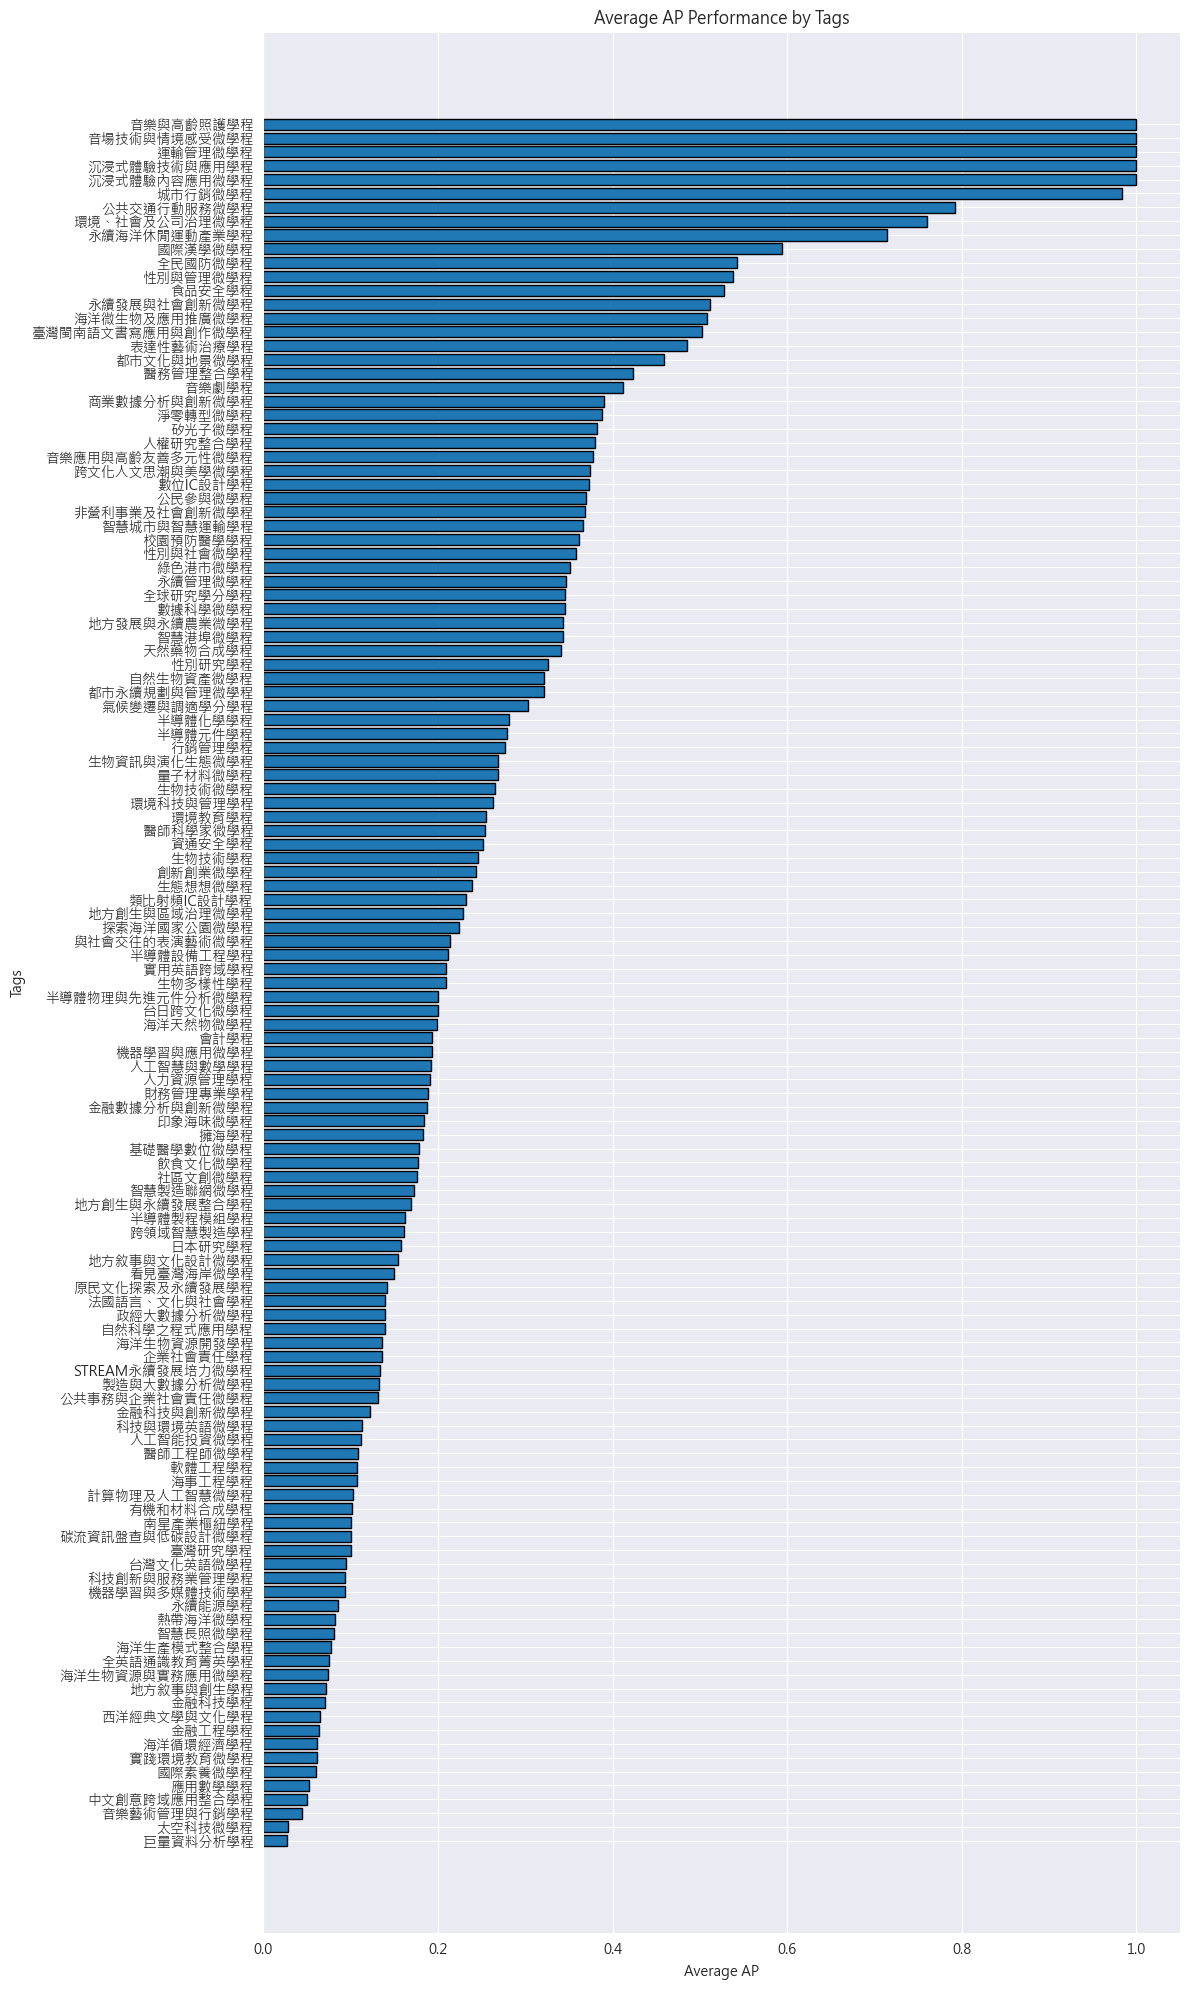

In [12]:
# Config the font for support for Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# Visualize the AP performance by Tags
plt.figure(figsize=(12, 20))
plt.barh(grouped_by_tags_sorted['tags'], grouped_by_tags_sorted['AP'], edgecolor='black')
plt.title('Average AP Performance by Tags')
plt.xlabel('Average AP')
plt.ylabel('Tags')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()